<a href="https://colab.research.google.com/github/KyeoRaeHan/AI_Solution_Course_DL/blob/main/MLP_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt

In [3]:
# 데이터세트 로딩
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 고유한 훈련 레이블 개수 세기
unique, counts = np.unique(y_train, return_counts=True)
# 딕셔너리 형태로 뽑으라는 건가...?
print("Train labels: ", dict(zip(unique, counts)))

Train labels:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [8]:
print(unique, counts)

[0 1 2 3 4 5 6 7 8 9] [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


In [9]:
sum(counts)

60000

In [11]:
sum(str(unique))

TypeError: ignored

In [13]:
# 훈련 데이터세트에서 25개의 mnist 숫자 샘플 추출하기
indexes = np.random.randint(0, x_train.shape[0], size=25)
images  = x_train[indexes]
labels = y_train[indexes]

In [26]:
# 0부터 5까지의 랜덤한 정수 1개 출력 0부터 5까지의 랜덤한 정수 1개 출력
np.random.randint(6)
np.random.randint(6)

3

In [14]:
indexes

array([42950, 53012, 59047, 15012,  8915, 54138, 45570, 49700, 17409,
       46249, 17482, 17644, 15490, 49407, 12452, 25286, 24049, 57379,
       37510, 45888, 50523, 43062, 52863, 19004, 34031])

In [22]:
%cd drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [23]:
%pwd

'/content/drive/My Drive/Colab Notebooks'

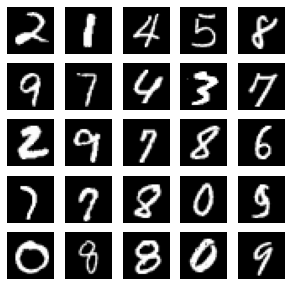

In [24]:
# 25개의 mnist 숫자 그리기
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
   plt.subplot(5,5, i+1)
   image = images[i]
   plt.imshow(image, cmap='gray')
   plt.axis('off')

plt.show()
# 이미지 파일 저장mnist 숫자 그리기
plt.figure(figsize=(5,5))
for i in range(len(indexes)):
   plt.subplot(5,5, i+1)
      image = images[i]
         plt.imshow(image, cmap='gray')
            plt.axis('off')

plt.show()
 # 이미지 파일 저장
plt.savefig("mnist-samples.png")
plt.close('all')

In [ ]:
for i in range(len(indexes)):
   plt.subplot(5,5, i+1)
      image = images[i]
         plt.imshow(image, cmap='gray')
            plt.axis('off')

In [28]:
ㅁthr_index = np.arange(0.3,0.6, 0.01)

In [18]:
thr_index

array([0.3 , 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ,
       0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51,
       0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59])

NameError: ignored

In [34]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.utils import to_categorical, plot_model
from keras.datasets import mnist

In [35]:
# MNIST 데이터세트 로딩
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# 레이블 개수 계산
num_labels = len(np.unique(y_train))

In [41]:
x_train.shape

(60000, 28, 28)

In [36]:
# 원 - 핫 벡터로 변환
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [37]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [38]:
# 이미지 차원
image_size = x_train.shape[1]
input_size = image_size * image_size

In [ ]:
# 크기조정, 정규화
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_test = np.reshape(x_test, [-1, input_size])
x_test = x_test.astype('float32') / 255

In [38]:
# 60000개를 128개로 나눠서 학습
# batch는 한 번 훈련당 크기
batch_size = 128
hidden_units = 256
dropout = 0.45

In [42]:
# 모델: 3개의 계층으로 이루어진 MLP(각 계층 다음에는 Relu와 드롭아웃을 적용)
model = Sequential()
model.add(Dense(hidden_units, input_dim=input_size))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(hidden_units))
model.add(Activation('relu'))
model.add(Dropout(dropout))
model.add(Dense(num_labels))

NameError: ignored

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, epochs=20, batch_size=batch_size)

In [ ]:
# validate the model on test dataset to determine generalization
_, acc = model.evaluate(x_test,
                        y_test,
                        batch_size=batch_size,
                        verbose=0)
print("\nTest accuracy: %.1f%%" % (100.0 * acc))